In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt 
from google.colab import drive
import numpy as np
import networkx as nx 

drive.mount('/content/drive')
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shareddrives/Time 7 - BANCO DE DADOS/musicoset_metadata/songs.csv"

df = pd.read_csv("/content/drive/Shareddrives/Time 7 - BANCO DE DADOS/musicoset_metadata/songs.csv", error_bad_lines=False)
print(df['popularity'])
print(df['popularity'][0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/Shareddrives/Time 7 - BANCO DE DADOS/musicoset_metadata/songs.csv'
0        86
1        87
2        85
3        92
4        86
         ..
20400    36
20401     1
20402    20
20403     7
20404    57
Name: popularity, Length: 20405, dtype: int64
86


In [226]:
def relationExplicit(dataset, matrix, weight):
  for i in range(len(matrix)):
    for j in range(i,len(matrix)):
      if (dataset['explicit'][i] == dataset['explicit'][j] and i != j):
        matrix[i][j] += 1*weight

In [241]:
def relation_popularity(dataset, songs_table, weight):
  for i in range(len(songs_table)):
    for j in range(i+1,len(songs_table[i])):
      relation = (dataset['popularity'][i] + dataset['popularity'][j])/200
      songs_table[i][j] += relation*weight

In [171]:
def relation_artist(dataset, songs_table, weight):
    for i in range(len(songs_table)):
      for j in range(i+1,len(songs_table[i])):
        artists_in_common = 0
        artists1 = dataset['artists'][i][2:-1].split(' \'')
        artists2 = dataset['artists'][j][2:-1].split(' \'')
        for k in range(0, len(artists1), 2):
          for l in range(0, len(artists2), 2):
            if artists1[k] == artists2[l]:
              artists_in_common += 1
        songs_table[i][j] += artists_in_common*weight

In [244]:
def relation_song_type(dataset, matrix, weight):
  for i in range(len(matrix)):
    for j in range(i,len(matrix)):
      if (dataset['song_type'][i] == dataset['song_type'][j] and i != j):
        matrix[i][j] += 1*weight

In [172]:
matrix = np.zeros((2000, 2000))
relation_artist(df, matrix, 1)
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [186]:
G = nx.Graph()
max = 0
for i in range(2000): 
 for j in range(i+1,2000): 
    if (matrix[i][j] != 0): 
      G.add_edge(i, j, weight=matrix[i][j])
    if (matrix[i][j] > max):
      max = matrix[i][j]

max

3.0

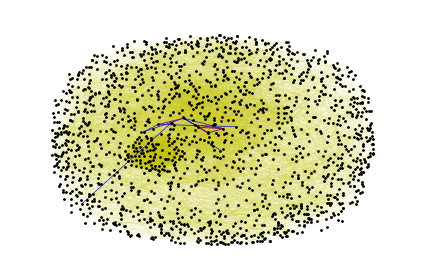

<Figure size 432x288 with 0 Axes>

In [192]:
e1 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= max*0.2 )]
e2 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.2 and d["weight"] <= max*0.4 )]
e3 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.4 and d["weight"] <= max*0.6 )]
e4 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.6 and d["weight"] <= max*0.8 )]
e5 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.8 )]


pos = nx.spring_layout(G, k=0.3, iterations=20, seed = 7)
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50

# nodes
nx.draw_networkx_nodes(G, pos, node_size=3,node_color="black")
# edges
nx.draw_networkx_edges(G, pos, edgelist=e1, width=0.05,edge_color="g")
nx.draw_networkx_edges(G, pos, edgelist=e2, width=0.05,edge_color="y")
nx.draw_networkx_edges(G, pos, edgelist=e3, width=0.45,edge_color="r")
nx.draw_networkx_edges(G, pos, edgelist=e4, width=0.65,edge_color="b")
nx.draw_networkx_edges(G, pos, edgelist=e5, width=0.85,edge_color="purple")



# labels
nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()
plt.savefig(fname="Grafo")

In [193]:
matrix = np.zeros((2000, 2000))
relation_song_type(df,matrix, 1)
matrix

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [197]:
G = nx.Graph()
max = 0
for i in range(1000): 
 for j in range(i+1,1000): 
    if (matrix[i][j] != 0): 
      G.add_edge(i, j, weight=matrix[i][j])
    if (matrix[i][j] > max):
      max = matrix[i][j]

max

1.0

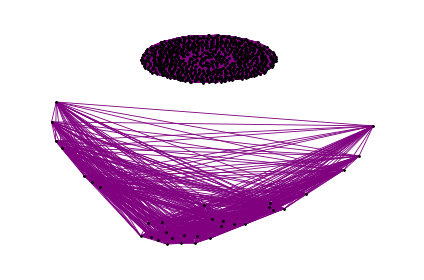

<Figure size 432x288 with 0 Axes>

In [201]:
e1 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= max*0.2 )]
e2 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.2 and d["weight"] <= max*0.4 )]
e3 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.4 and d["weight"] <= max*0.6 )]
e4 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.6 and d["weight"] <= max*0.8 )]
e5 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.8 )]


pos = nx.spring_layout(G, k=0.2, iterations=20, seed = 7)
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50

# nodes
nx.draw_networkx_nodes(G, pos, node_size=3,node_color="black")
# edges
nx.draw_networkx_edges(G, pos, edgelist=e1, width=0.05,edge_color="g")
nx.draw_networkx_edges(G, pos, edgelist=e2, width=0.05,edge_color="y")
nx.draw_networkx_edges(G, pos, edgelist=e3, width=0.45,edge_color="r")
nx.draw_networkx_edges(G, pos, edgelist=e4, width=0.65,edge_color="b")
nx.draw_networkx_edges(G, pos, edgelist=e5, width=0.85,edge_color="purple")



# labels
nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()
plt.savefig(fname="Grafo")

In [202]:
matrix = np.zeros((1000, 1000))
relation_popularity(df, matrix, 1)
matrix

array([[0.   , 0.865, 0.855, ..., 0.685, 0.73 , 0.77 ],
       [0.   , 0.   , 0.86 , ..., 0.69 , 0.735, 0.775],
       [0.   , 0.   , 0.   , ..., 0.68 , 0.725, 0.765],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.555, 0.595],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.64 ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [209]:
G = nx.Graph()
max = 0
for i in range(500): 
 for j in range(i+1,500): 
    if (matrix[i][j] != 0): 
      G.add_edge(i, j, weight=matrix[i][j])
    if (matrix[i][j] > max):
      max = matrix[i][j]

max

0.895

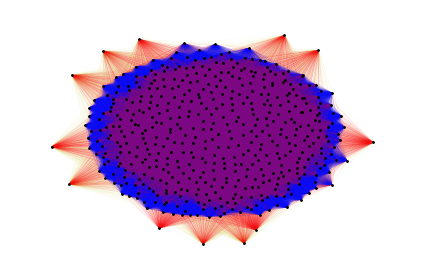

<Figure size 432x288 with 0 Axes>

In [210]:
e1 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= max*0.2 )]
e2 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.2 and d["weight"] <= max*0.4 )]
e3 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.4 and d["weight"] <= max*0.6 )]
e4 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.6 and d["weight"] <= max*0.8 )]
e5 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.8 )]


pos = nx.spring_layout(G, k=0.5, iterations=20, seed = 7)
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50

# nodes
nx.draw_networkx_nodes(G, pos, node_size=3,node_color="black")
# edges
nx.draw_networkx_edges(G, pos, edgelist=e1, width=0.005,edge_color="g")
nx.draw_networkx_edges(G, pos, edgelist=e2, width=0.025,edge_color="y")
nx.draw_networkx_edges(G, pos, edgelist=e3, width=0.045,edge_color="r")
nx.draw_networkx_edges(G, pos, edgelist=e4, width=0.065,edge_color="b")
nx.draw_networkx_edges(G, pos, edgelist=e5, width=0.085,edge_color="purple")



# labels
nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()
plt.savefig(fname="Grafo")

In [211]:
matrix = np.zeros((1000, 1000))
relationExplicit(df,matrix,1)
matrix

array([[0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [212]:
G = nx.Graph()
max = 0
for i in range(500): 
 for j in range(i+1,500): 
    if (matrix[i][j] != 0): 
      G.add_edge(i, j, weight=matrix[i][j])
    if (matrix[i][j] > max):
      max = matrix[i][j]

max

1.0

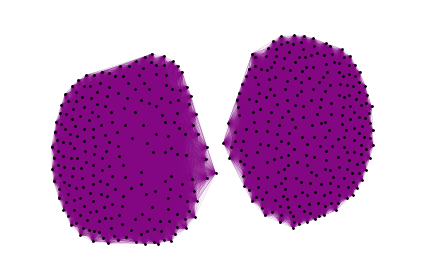

<Figure size 432x288 with 0 Axes>

In [215]:
e1 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= max*0.2 )]
e2 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.2 and d["weight"] <= max*0.4 )]
e3 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.4 and d["weight"] <= max*0.6 )]
e4 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.6 and d["weight"] <= max*0.8 )]
e5 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.8 )]


pos = nx.spring_layout(G, k=0.5, iterations=20, seed = 7)
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50

# nodes
nx.draw_networkx_nodes(G, pos, node_size=3,node_color="black")
# edges
nx.draw_networkx_edges(G, pos, edgelist=e1, width=0.005,edge_color="g")
nx.draw_networkx_edges(G, pos, edgelist=e2, width=0.025,edge_color="y")
nx.draw_networkx_edges(G, pos, edgelist=e3, width=0.045,edge_color="r")
nx.draw_networkx_edges(G, pos, edgelist=e4, width=0.065,edge_color="b")
nx.draw_networkx_edges(G, pos, edgelist=e5, width=0.085,edge_color="purple")



# labels
nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()
plt.savefig(fname="GrafoExplicito")

In [255]:
matrix = np.zeros((1000, 1000))
relationExplicit(df,matrix, 1)
relation_popularity(df, matrix, 1)
relation_song_type(df,matrix, 1)
relation_artist(df, matrix, 1)
matrix
np.savetxt("matrix1000mid.csv", matrix, delimiter=",")

In [256]:
table = []
for i in range(len(matrix)):
  for j in range(len(matrix)):
    if (matrix[i][j] != 0):
      table.append([df['song_id'][i], df['song_id'][j], matrix[i][j] ])

table = pd.DataFrame(table, columns = ['Song_1', 'Song_2','Relation'])
table
table.to_csv('relationTable1000.csv', sep=',')

In [269]:
new_df = df[0:1000]
#new_df = new_df.drop(columns=["billboard"])
#new_df = new_df.drop(new_df.index[range(1000, 20403)])
new_df.to_csv('musicTable1000.csv', sep=',')
new_df

,song_id,song_name,billboard,artists,popularity,explicit,song_type
0,3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next","('Thank U, Next', 'Ariana Grande')",{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},86,True,Solo
1,5p7ujcrUXASCNwRaWNHR1C,Without Me,"('Without Me', 'Halsey')",{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},87,True,Solo
2,2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,"('Sicko Mode', 'Travis Scott')",{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},85,True,Solo
3,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,('Sunflower (Spider-Man: Into The Spider-Verse...,"{'246dkjvS1zLTtiykXe5h60': 'Post Malone', '1zN...",92,False,Collaboration
4,1rqqCSm0Qe4I9rUvWncaom,High Hopes,"('High Hopes', 'Panic! At The Disco')",{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},86,False,Solo
...,...,...,...,...,...,...,...
995,0fYVliAYKHuPmECRs1pbRf,Renegades,"('Renegades', 'X Ambassadors')",{'3NPpFNZtSTHheNBaWC82rB': 'X Ambassadors'},72,False,Solo
996,2SnNaoNhMjC1WRMTWD8qTX,Mark My Words,"('Mark My Words', 'Justin Bieber')",{'1uNFoZAHBGtllmzznpCI3s': 'Justin Bieber'},59,False,Solo
997,3jSyE8r8vgg8fmwojoMzql,Already Callin' You Mine,"(""Already Callin' You Mine"", 'Parmalee')",{'4TshyQDihSYXSWqvclXl3I': 'Parmalee'},51,False,Solo
998,422lAAWQO9TqL1LxIPdhOn,Random,"('Random', 'G-Eazy')",{'02kJSzxNuaWGqwubyUba0Z': 'G-Eazy'},60,True,Solo


In [221]:
G = nx.Graph()
max = 0
for i in range(200): 
 for j in range(i+1,200): 
    if (matrix[i][j] != 0): 
      G.add_edge(i, j, weight=matrix[i][j])
    if (matrix[i][j] > max):
      max = matrix[i][j]

max

4.6899999999999995

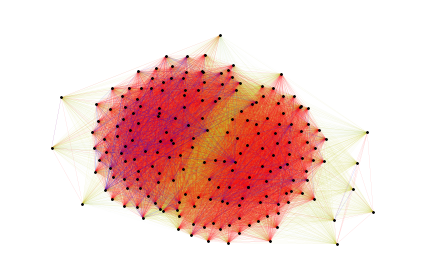

<Figure size 432x288 with 0 Axes>

In [223]:
e1 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= max*0.2 )]
e2 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.2 and d["weight"] <= max*0.4 )]
e3 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.4 and d["weight"] <= max*0.6 )]
e4 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.6 and d["weight"] <= max*0.8 )]
e5 = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] > max*0.8 )]


pos = nx.spring_layout(G, k=0.2, iterations=20, seed = 7)
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50

# nodes
nx.draw_networkx_nodes(G, pos, node_size=3,node_color="black")
# edges
nx.draw_networkx_edges(G, pos, edgelist=e1, width=0.005,edge_color="g")
nx.draw_networkx_edges(G, pos, edgelist=e2, width=0.025,edge_color="y")
nx.draw_networkx_edges(G, pos, edgelist=e3, width=0.045,edge_color="r")
nx.draw_networkx_edges(G, pos, edgelist=e4, width=0.065,edge_color="b")
nx.draw_networkx_edges(G, pos, edgelist=e5, width=0.085,edge_color="purple")



# labels
nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()
plt.savefig(fname="GrafoExplicito")